# Exploratory Data Analysis on Novel Coronavirus

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [313]:
df = pd.read_csv('covid_19_data.csv')
df2 = pd.read_csv('indian_data.csv')
df3 = pd.read_csv('TimeProvince.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [314]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,6162.000000,6162.000000,6162.000000,6162.000000
mean,3081.500000,588.957481,18.960240,220.271503
std,1778.960511,4908.724815,198.962911,2466.089672
min,1.000000,0.000000,0.000000,0.000000
25%,1541.250000,2.000000,0.000000,0.000000
50%,3081.500000,11.000000,0.000000,0.000000
75%,4621.750000,100.000000,1.000000,12.000000
max,6162.000000,67798.000000,3099.000000,55142.000000


# India

In [315]:
df_countries = df.groupby(['Country/Region'])
df_countries.get_group('India').sort_values('ObservationDate',ascending=True).head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


### Clearly the first case in india was reported on  january 30 2020

In [316]:
df_countries.get_group('India').sort_values('ObservationDate',ascending=False).agg(sum)

SNo                                                           114832
ObservationDate    03/16/202003/15/202003/14/202003/13/202003/12/...
Province/State                                                     0
Country/Region     IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...
Last Update        2020-03-16T14:38:452020-03-15T18:20:182020-03-...
Confirmed                                                        911
Deaths                                                            10
Recovered                                                        115
dtype: object

### till Mach 16 india reaches 911 confirmed cases, 10 deaths and 115 recovered cases

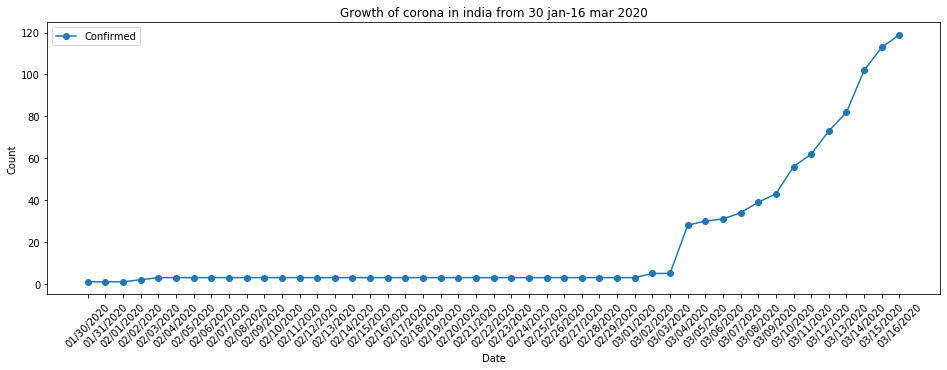

In [417]:
plt.figure(figsize=(16,5))
df_countries = df.groupby(['Country/Region'])
df_india = df_countries.get_group('India').sort_values('ObservationDate',ascending=True).drop_duplicates('ObservationDate')

plt.plot(df_india['ObservationDate'],df_india['Confirmed'],label='Confirmed',marker='o')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Growth of corona in india from 30 jan-16 mar 2020')
plt.show()

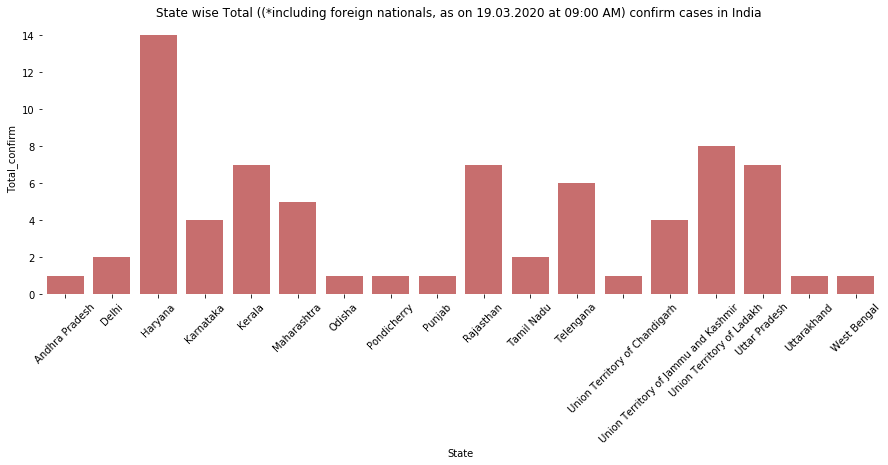

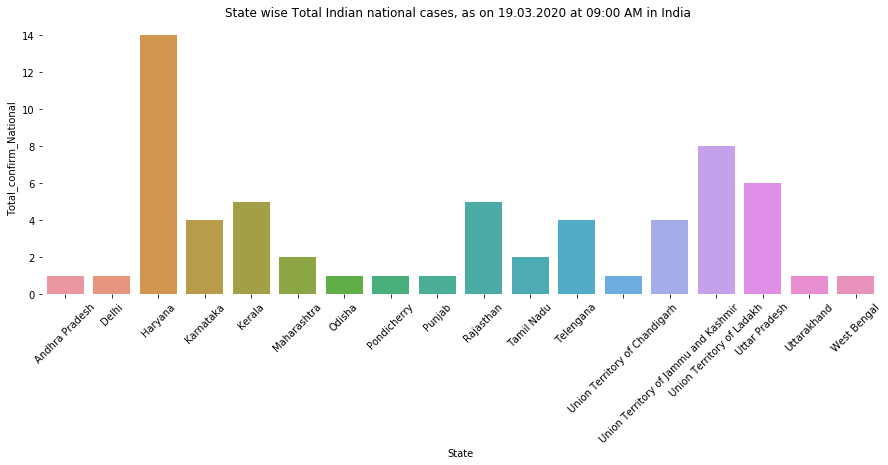

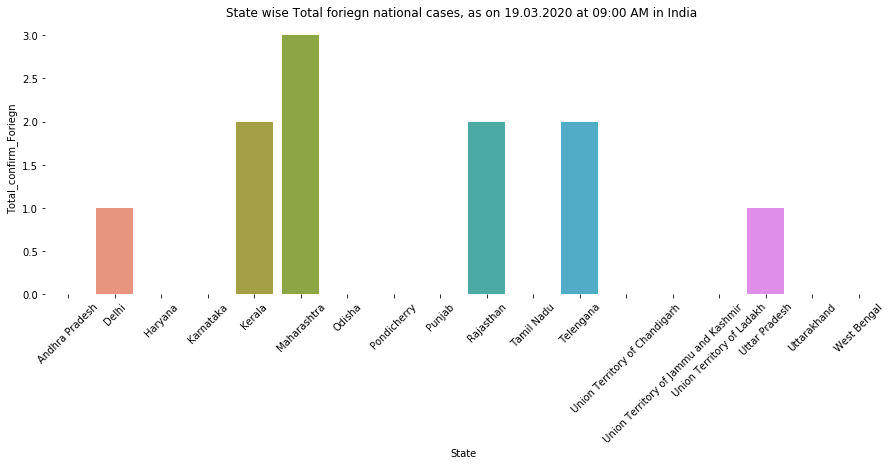

In [412]:
df2['Total_confirm'] = df2['Total_confirm_National'] + df2['Total_confirm_Foriegn']
plt.figure(figsize=(15,5))
sns.barplot(df2['State'],df2['Total_confirm'],color='r')

plt.xticks(rotation=45)
plt.title('State wise Total ((*including foreign nationals, as on 19.03.2020 at 09:00 AM) confirm cases in India ')
sns.despine(left=True, bottom=True)
plt.show()


plt.figure(figsize=(15,5))
sns.barplot(df2['State'],df2['Total_confirm_National'])

plt.xticks(rotation=45)
plt.title('State wise Total Indian national cases, as on 19.03.2020 at 09:00 AM in India ')
sns.despine(left=True, bottom=True)
plt.show()


plt.figure(figsize=(15,5))
sns.barplot(df2['State'],df2['Total_confirm_Foriegn'])

plt.xticks(rotation=45)
plt.title('State wise Total foriegn national cases, as on 19.03.2020 at 09:00 AM in India ')
sns.despine(left=True, bottom=True)
plt.show()

- Haryana faced highest corona cases in Total
- Up,Ladakh and Jammu have high spread nationally 
- Maharashtra has highest spread due to foriegners
- While Rajasthan , Kerela and Telengana are second highest to affect by foriegners

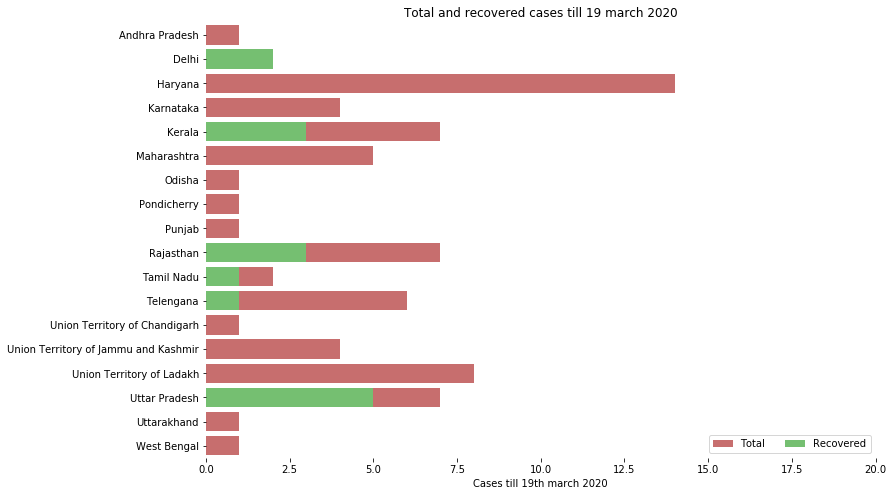

In [416]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Total_confirm',y='State',data=df2,label='Total',color='r')
sns.set_color_codes('muted')
sns.barplot(x='Recovered',y='State',data=df2,label='Recovered',color='g')
sns.despine(left=True, bottom=True)
plt.title('Total and recovered cases till 19 march 2020')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20), ylabel="",xlabel="Cases till 19th march 2020")
plt.show()

### Rate of Growth ,recovery and Death in India  by Coronavirus

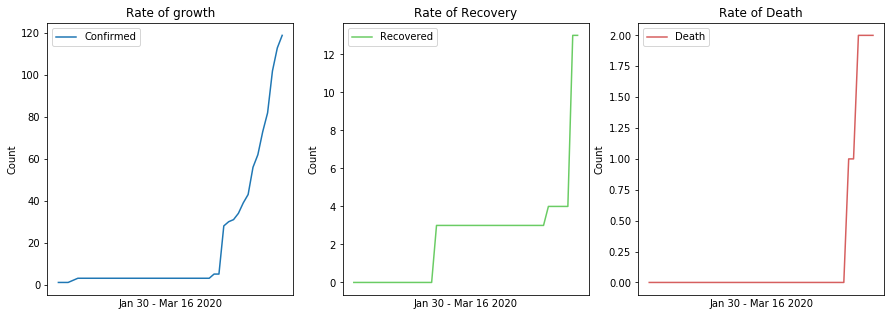

In [320]:
plt.figure(figsize=(15,5))
df_countries = df.groupby(['Country/Region'])
df_india = df_countries.get_group('India').sort_values('ObservationDate',ascending=True).drop_duplicates('ObservationDate')
plt.subplot(1,3,1)
plt.plot(df_india['ObservationDate'],df_india['Confirmed'],label='Confirmed')
plt.legend()
plt.tick_params(labelbottom=False,bottom=False)
plt.xlabel('Jan 30 - Mar 16 2020')
plt.ylabel('Count')
plt.title('Rate of growth')

plt.subplot(1,3,2)
plt.plot(df_india['ObservationDate'],df_india['Recovered'],label='Recovered',color='g')
plt.legend()
plt.tick_params(labelbottom=False,bottom=False)
plt.xlabel('Jan 30 - Mar 16 2020')
plt.ylabel('Count')
plt.title('Rate of Recovery')

plt.subplot(1,3,3)
plt.plot(df_india['ObservationDate'],df_india['Deaths'],label='Death',color='r')
plt.legend()
plt.tick_params(labelbottom=False,bottom=False)
plt.xlabel('Jan 30 - Mar 16 2020')
plt.ylabel('Count')
plt.title('Rate of Death')
plt.show()

### Rate of Growth ,recovery and Death in South Korea

- got its first case on 20 jan 2020

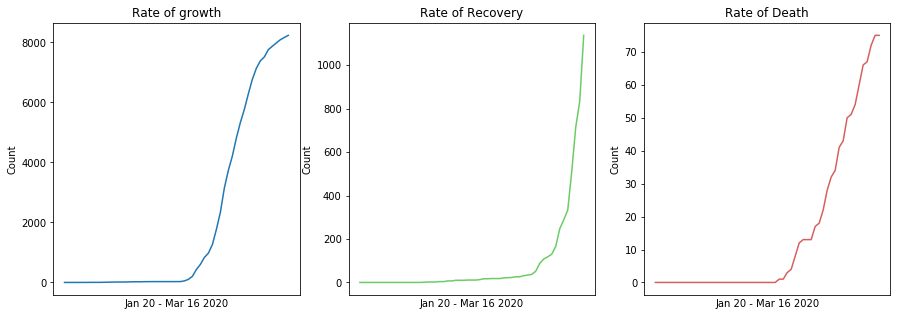

In [369]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df_korea = df3.groupby('date').agg(sum).sort_values('date').reset_index()
df_korea['date'] = df_korea['date'].astype('datetime64')
plt.plot(df_korea['date'],df_korea['confirmed'])
plt.tick_params(labelbottom=False,bottom=False)
plt.title('Rate of growth')
plt.xlabel('Jan 20 - Mar 16 2020')
plt.ylabel('Count')
plt.subplot(1,3,2)
plt.plot(df_korea['date'],df_korea['released'],color='g')
plt.tick_params(labelbottom=False,bottom=False)
plt.title('Rate of Recovery')
plt.xlabel('Jan 20 - Mar 16 2020')
plt.ylabel('Count')
plt.subplot(1,3,3)
plt.plot(df_korea['date'],df_korea['deceased'],color='r')
plt.tick_params(labelbottom=False,bottom=False)
plt.title('Rate of Death')
plt.xlabel('Jan 20 - Mar 16 2020')
plt.ylabel('Count')
plt.show()

### Top 30 countries with maximum deaths till 16th March 2020 (other than china)

In [398]:
df_all = df.groupby(['Country/Region']).agg(sum).reset_index().sort_values('Deaths',ascending=False)



index = df_all[df_all['Country/Region']=='Mainland China'].index
df_all = df_all.drop(index)
df_all = df_all.head(30)
df_all

,Country/Region,SNo,Confirmed,Deaths,Recovered
77,Italy,113045,170830.0,10740.0,14988.0
73,Iran,92142,117303.0,5043.0,33199.0
146,Spain,113313,39259.0,1169.0,2289.0
145,South Korea,114621,121156.0,883.0,4496.0
51,France,239142,31282.0,634.0,294.0
162,US,4647219,20204.0,465.0,239.0
80,Japan,114940,10817.0,224.0,1650.0
161,UK,185565,7473.0,140.0,352.0
115,Others,107956,21260.0,137.0,2244.0
108,Netherlands,81999,6782.0,88.0,6.0


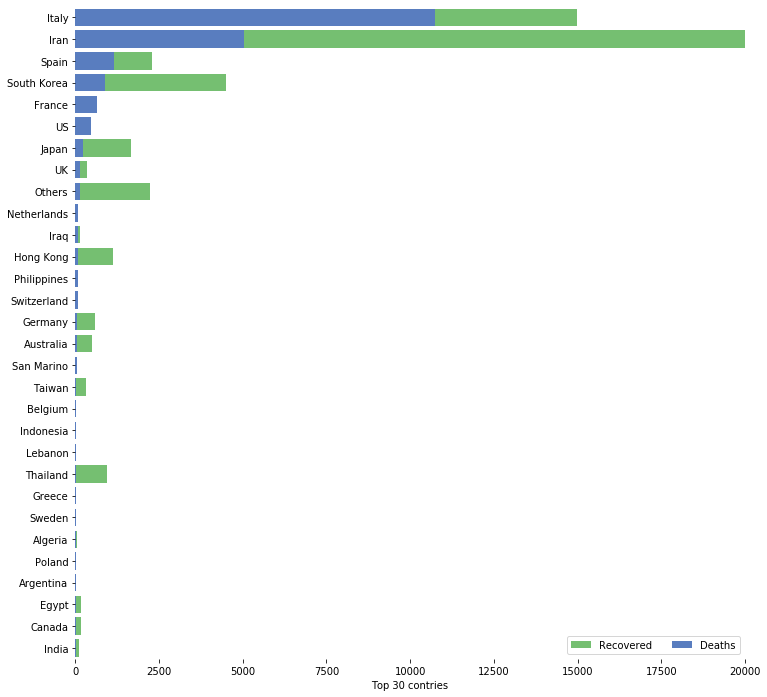

In [415]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(df_all['Recovered'],df_all['Country/Region'],color='g',label='Recovered')
sns.barplot(df_all['Deaths'],df_all['Country/Region'],color='b',label='Deaths')

sns.despine(left=True,bottom=True)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,20000), ylabel="",xlabel="Top 30 contries")
plt.show()


### To be Continued . . .